In [1]:
from src.lib.mapmatching import MapMatching
from src.lib.visualizer import Visualizer
from src.type import PositionWithTimestamp
from logging import getLogger
import time

In [2]:
logger = getLogger(__name__)

map_matching = MapMatching("UNUSED", logger)
visualizer = Visualizer("UNUSED", logger)

In [3]:
points: list[PositionWithTimestamp] = [
    PositionWithTimestamp(22.01, -1.16, 0, 0.0),
    PositionWithTimestamp(22.00, -1.66, 0, 0.5),
    PositionWithTimestamp(21.80, -2.16, 0, 1.0),
    PositionWithTimestamp(21.60, -2.66, 0, 1.5),
    PositionWithTimestamp(21.40, -3.16, 0, 2.0),
    PositionWithTimestamp(21.20, -3.66, 0, 2.5),
    PositionWithTimestamp(21.00, -4.16, 0, 3.0),
    PositionWithTimestamp(20.80, -4.66, 0, 3.5),
    PositionWithTimestamp(20.60, -5.16, 0, 4.0),
    PositionWithTimestamp(20.40, -5.66, 0, 4.5),
    PositionWithTimestamp(20.20, -6.16, 0, 5.0),
    PositionWithTimestamp(20.00, -6.66, 0, 5.5),
    PositionWithTimestamp(19.80, -7.16, 0, 6.0),
    PositionWithTimestamp(19.60, -7.66, 0, 6.5),
    PositionWithTimestamp(19.40, -8.16, 0, 7.0),
    PositionWithTimestamp(19.20, -8.66, 0, 7.5),
    PositionWithTimestamp(19.00, -9.16, 0, 8.0),
]

# 補正後のpoints
correction_points = map_matching.map_matching(points)

datetime = time.strftime("%Y%m%d_%H%M%S")

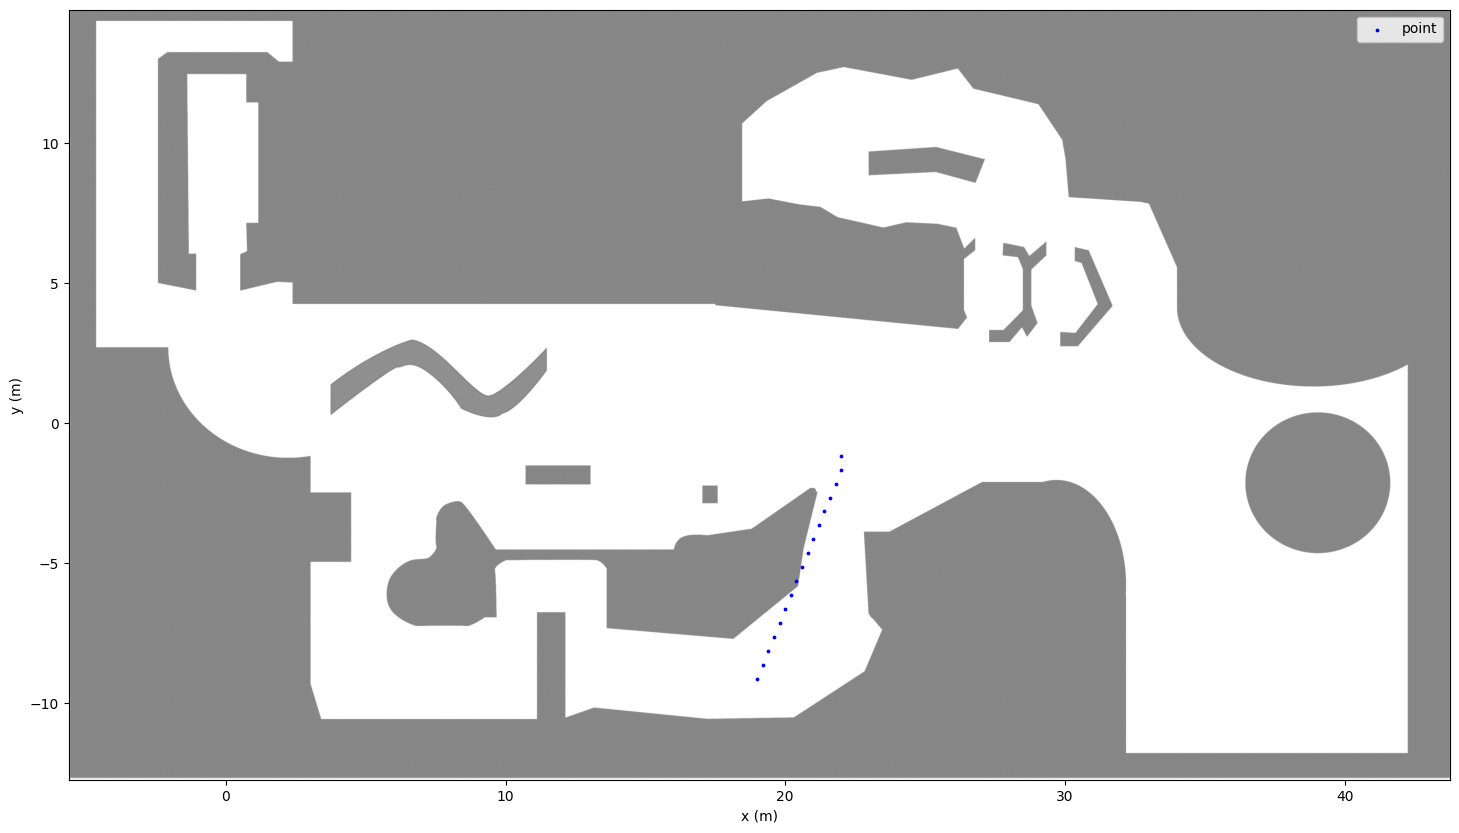

In [4]:
# 補正前
visualizer.plot_map_for_mapmatching(points, f"zzz/{datetime}.png")

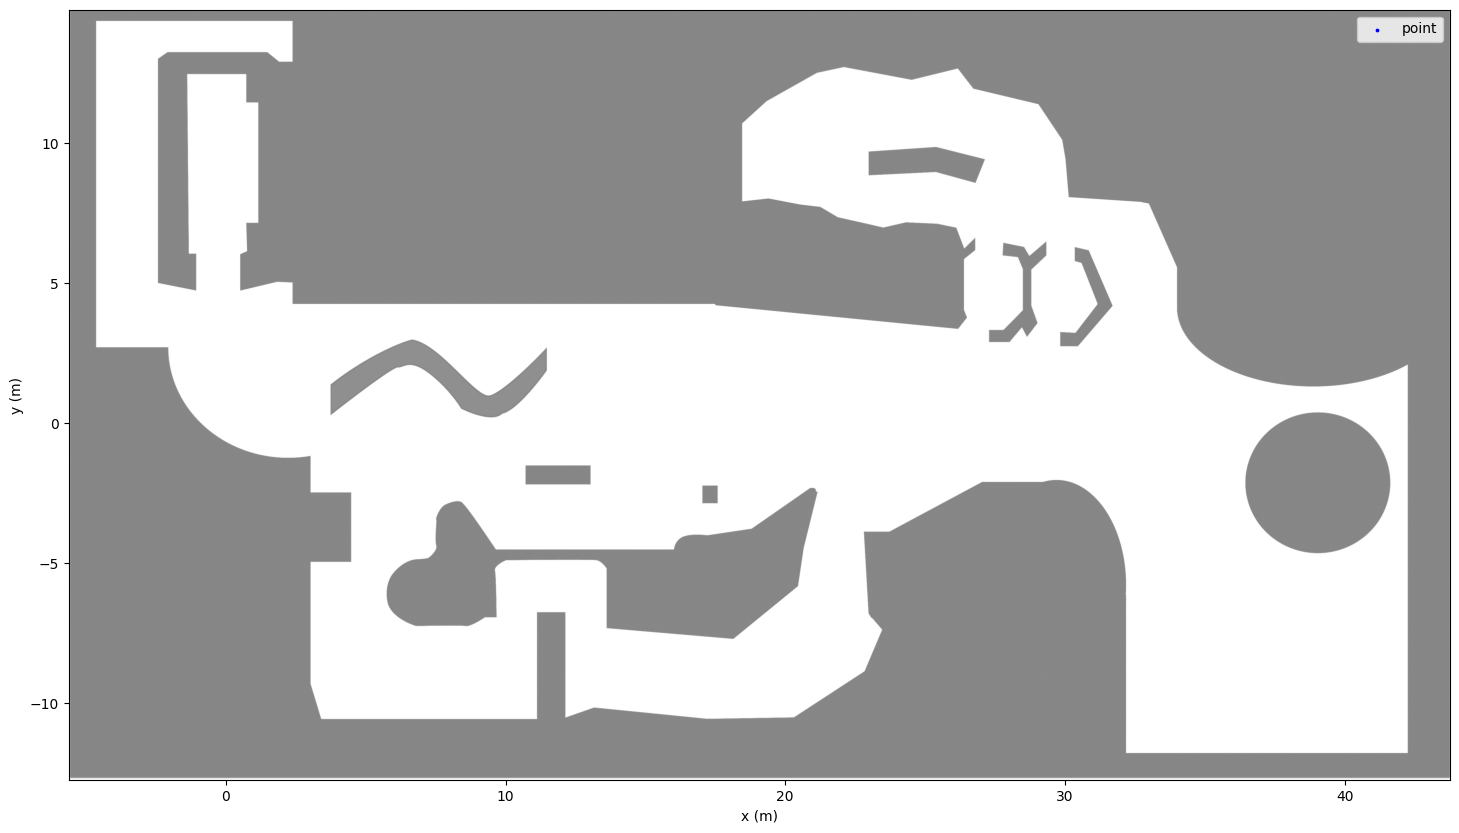

In [5]:
# 補正後
visualizer.plot_map_for_mapmatching(correction_points, f"zzz/{datetime}.png")